In [3]:
import pandas as pd
pos_lab = pd.read_csv('../data/final/positive_class_lab_wrangled.csv')

In [7]:
pos_lab.head()

,patientunitstayid,time_to_detect,labresultoffset,akidetection,age,gender,ethnicity,patienthealthsystemstayid,hospitaladmitoffset,unitdischargeoffset,...,glucose_max,glucose_var,potassium_min,potassium_mean,potassium_max,potassium_var,sodium_min,sodium_mean,sodium_max,sodium_var
0,141227,1 days 00:50:00,-128,1362,82,Male,Caucasian,128968,-1004,1652,...,130.0,200.000000,4.2,4.200000,4.2,0.000000,133.0,133.500000,134.0,0.500000
1,141227,0 days 22:55:00,-13,1362,82,Male,Caucasian,128968,-1004,1652,...,157.0,556.333333,4.1,4.166667,4.2,0.003333,132.0,133.000000,134.0,1.000000
2,141462,2 days 20:56:00,-1114,3022,80,Male,Caucasian,129166,-1,5198,...,283.0,24.500000,3.3,3.450000,3.6,0.045000,136.0,137.000000,138.0,2.000000
3,141462,1 days 23:10:00,192,3022,80,Male,Caucasian,129166,-1,5198,...,283.0,56.333333,3.3,3.533333,3.7,0.043333,132.0,135.333333,138.0,9.333333
4,141462,0 days 23:35:00,1607,3022,80,Male,Caucasian,129166,-1,5198,...,276.0,277.333333,3.3,3.600000,3.8,0.070000,132.0,134.333333,136.0,4.333333


In [8]:
neg_lab_rand = pd.read_csv('../data/final/negative_class_rand_lab_wrangled.csv')

In [13]:
import numpy as np
neg_lab_rand['time_to_detect'] = pd.to_datetime(np.nan)
neg_lab_rand['akidetection'] = np.nan
neg_lab_rand.head()

,patientunitstayid,labresultoffset,age,gender,ethnicity,patienthealthsystemstayid,hospitaladmitoffset,unitdischargeoffset,BUN,bicarbonate,...,potassium_min,potassium_mean,potassium_max,potassium_var,sodium_min,sodium_mean,sodium_max,sodium_var,time_to_detect,akidetection
0,141229,0 days 23:09:00,> 89,Female,Caucasian,128970,-4,166,20.0,32.0,...,2.9,3.450000,4.0,6.050000e-01,138.0,140.500000,143.0,12.500000,NaT,NaN
1,141229,1 days 04:57:00,> 89,Female,Caucasian,128970,-4,166,21.0,31.0,...,2.9,3.666667,4.1,4.433333e-01,138.0,140.333333,143.0,6.333333,NaT,NaN
2,141304,0 days 01:33:00,70,Male,Caucasian,129031,-3,6639,48.0,29.0,...,4.8,5.300000,5.8,5.000000e-01,140.0,140.500000,141.0,0.500000,NaT,NaN
3,141304,1 days 02:46:00,70,Male,Caucasian,129031,-3,6639,30.0,26.0,...,3.6,4.733333,5.8,1.213333e+00,140.0,142.333333,146.0,10.333333,NaT,NaN
4,141304,2 days 01:38:00,70,Male,Caucasian,129031,-3,6639,33.0,24.0,...,3.6,3.600000,3.6,2.220446e-15,145.0,145.500000,146.0,0.500000,NaT,NaN


In [10]:
pos_lab.columns

Index(['patientunitstayid', 'time_to_detect', 'labresultoffset',
       'akidetection', 'age', 'gender', 'ethnicity',
       'patienthealthsystemstayid', 'hospitaladmitoffset',
       'unitdischargeoffset', 'BUN', 'bicarbonate', 'calcium', 'chloride',
       'creatinine', 'glucose', 'potassium', 'sodium', 'positive_window',
       'BUN_min', 'BUN_mean', 'BUN_max', 'BUN_var', 'bicarbonate_min',
       'bicarbonate_mean', 'bicarbonate_max', 'bicarbonate_var', 'calcium_min',
       'calcium_mean', 'calcium_max', 'calcium_var', 'chloride_min',
       'chloride_mean', 'chloride_max', 'chloride_var', 'creatinine_min',
       'creatinine_mean', 'creatinine_max', 'creatinine_var', 'glucose_min',
       'glucose_mean', 'glucose_max', 'glucose_var', 'potassium_min',
       'potassium_mean', 'potassium_max', 'potassium_var', 'sodium_min',
       'sodium_mean', 'sodium_max', 'sodium_var'],
      dtype='object')

In [14]:
len(pos_lab.columns)

51

In [15]:
len(neg_lab_rand.columns)

51

In [16]:
combined_df = pd.concat([pos_lab, neg_lab_rand], axis=0)
len(combined_df)

175884

In [28]:
combined_df.positive_window.sum()

11752.0

In [98]:
index_pos = combined_df[combined_df['positive_window']==1]['patienthealthsystemstayid'].unique()
index_neg = combined_df[combined_df['positive_window']==0]['patienthealthsystemstayid'].unique()
print(index_pos.shape)
print(index_neg.shape)

(10307,)
(37942,)


In [99]:
overlapping_indices = [index for index in index_pos if index in index_neg]
len(overlapping_indices)

6999

In [100]:
# remove overlapping indices
index_neg = [index for index in index_neg if index not in overlapping_indices]
len(index_neg)

30943

In [37]:
#import time
#start_time = time.time()
#print(start_time - time.time())

In [94]:
# generate 4 folds for cross validation
def stratified_splitter(index_pos, index_neg):
    def rand_gen_opposite(index_list):
        rand_index_list = np.random.choice(index_list, size=int(len(index_list)/2), replace=False)
        rand_index_inverse = [index for index in index_list if index not in rand_index_list]
        return rand_index_list, rand_index_inverse
    index_rand_pos_1_2, index_rand_pos_3_4 = rand_gen_opposite(index_pos)
    index_rand_neg_1_2, index_rand_neg_3_4 = rand_gen_opposite(index_neg)
    index_rand_pos_1, index_rand_pos_2 = rand_gen_opposite(index_rand_pos_1_2)
    index_rand_pos_3, index_rand_pos_4 = rand_gen_opposite(index_rand_pos_3_4)
    index_rand_neg_1, index_rand_neg_2 = rand_gen_opposite(index_rand_neg_1_2)
    index_rand_neg_3, index_rand_neg_4 = rand_gen_opposite(index_rand_neg_3_4)   
    
    combined_index_1 = np.concatenate((index_rand_pos_1, index_rand_neg_1))
    combined_index_2 = np.concatenate((index_rand_pos_2, index_rand_neg_2))
    combined_index_3 = np.concatenate((index_rand_pos_3, index_rand_neg_3))
    combined_index_4 = np.concatenate((index_rand_pos_4, index_rand_neg_4))
    return combined_index_1, combined_index_2, combined_index_3, combined_index_4


In [55]:
# index_rand_pos = np.random.choice(index_pos, size=3500, replace=False)
# index_rand_neg = np.random.choice(index_neg, size=10000, replace=False)
# combined_index = np.concatenate((index_rand_pos, index_rand_neg))
# combined_index.shape

(13500,)

In [101]:
combined_index_1, combined_index_2, combined_index_3, combined_index_4 = stratified_splitter(index_pos, index_neg)
fold_1 = combined_df[combined_df['patienthealthsystemstayid'].isin(combined_index_1)]
fold_2 = combined_df[combined_df['patienthealthsystemstayid'].isin(combined_index_2)]
fold_3 = combined_df[combined_df['patienthealthsystemstayid'].isin(combined_index_3)]
fold_4 = combined_df[combined_df['patienthealthsystemstayid'].isin(combined_index_4)]

print(len(fold_1))
print(len(fold_2))
print(len(fold_3))
print(len(fold_4))

43380
44499
44285
43720


In [102]:
print(fold_1.positive_window.sum()/len(fold_1))
print(fold_2.positive_window.sum()/len(fold_2))
print(fold_3.positive_window.sum()/len(fold_3))
print(fold_4.positive_window.sum()/len(fold_4))

0.06696634393729829
0.06645093148160633
0.06645591057920289
0.06740622140896615


In [118]:
cv1_train = np.concatenate((np.array(fold_1.index), np.array(fold_2.index)))
cv1_test = np.array(fold_3.index)
cv2_train = np.concatenate((np.array(fold_1.index), np.array(fold_3.index))) 
cv2_test = np.array(fold_2.index)
cv3_train = np.concatenate((np.array(fold_2.index), np.array(fold_3.index)))
cv3_test = np.array(fold_1.index)
cv_train = [cv1_train, cv2_train, cv3_train]
cv_test = [cv1_test, cv2_test, cv3_test]
custom_cv = zip(cv_train, cv_test)
custom_cv

In [119]:
train_index = np.concatenate((np.array(fold_1.index), np.array(fold_2.index), np.array(fold_3.index)))
X_train = combined_df.iloc[train_index][['BUN_min', 'BUN_mean', 'BUN_max', 'BUN_var', 'bicarbonate_min',
       'bicarbonate_mean', 'bicarbonate_max', 'bicarbonate_var', 'calcium_min',
       'calcium_mean', 'calcium_max', 'calcium_var', 'chloride_min',
       'chloride_mean', 'chloride_max', 'chloride_var', 'creatinine_min',
       'creatinine_mean', 'creatinine_max', 'creatinine_var', 'glucose_min',
       'glucose_mean', 'glucose_max', 'glucose_var', 'potassium_min',
       'potassium_mean', 'potassium_max', 'potassium_var', 'sodium_min',
       'sodium_mean', 'sodium_max', 'sodium_var']]
X_test = fold_4[['BUN_min', 'BUN_mean', 'BUN_max', 'BUN_var', 'bicarbonate_min',
       'bicarbonate_mean', 'bicarbonate_max', 'bicarbonate_var', 'calcium_min',
       'calcium_mean', 'calcium_max', 'calcium_var', 'chloride_min',
       'chloride_mean', 'chloride_max', 'chloride_var', 'creatinine_min',
       'creatinine_mean', 'creatinine_max', 'creatinine_var', 'glucose_min',
       'glucose_mean', 'glucose_max', 'glucose_var', 'potassium_min',
       'potassium_mean', 'potassium_max', 'potassium_var', 'sodium_min',
       'sodium_mean', 'sodium_max', 'sodium_var']]
y_train = combined_df.iloc[train_index]['positive_window']
y_test = fold_4['positive_window']

In [125]:
import time
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import average_precision_score, make_scorer

xgbc = xgb.XGBClassifier(scale_pos_weight=15, objective='binary:logistic', \
                         eval_metric=['aucpr'], \
                             random_state=random_state, early_stopping_rounds=10)


# Define our search space for grid search
search_space = [
  {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': range(3, 10),
    'colsample_bytree': [i/10.0 for i in range(1, 3)],
    'gamma': [i/10.0 for i in range(3)],
    'lambda': np.logspace(-4, 1, num=6) 
  }
]

# AUC and average precision as score
#scoring = {'AUC':'roc_auc', 'Average precision':make_scorer(average_precision_score)}
# Define grid search
grid = GridSearchCV(
  xgbc,
  param_grid=search_space,
  cv=custom_cv,
  #scoring=scoring,
  #refit='Average precision',
  verbose=1,
  n_jobs=-1
)
# Fit grid search
model = grid.fit(X_train, y_train)

Fitting 3 folds for each of 4032 candidates, totalling 12096 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 25.6min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 45.5min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 71.0min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 102.2min


WorkerInterrupt: 

In [32]:
model

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.2,
              early_stopping_rounds=10, eval_metric=['aucpr'], gamma=0.0,
              gpu_id=-1, importance_type='gain', interaction_constraints=None,
              learning_rate=0.3, max_delta_step=0, max_depth=12,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=2020, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=15, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

[[0.72609325 0.27390675]
 [0.58568035 0.41431965]]
              precision    recall  f1-score   support

         0.0       0.94      0.73      0.82     40773
         1.0       0.10      0.41      0.16      2947

    accuracy                           0.71     43720
   macro avg       0.52      0.57      0.49     43720
weighted avg       0.89      0.71      0.78     43720

Average precision: 0.09986452179725056


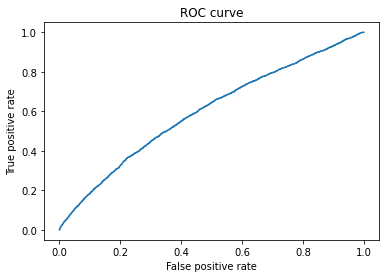

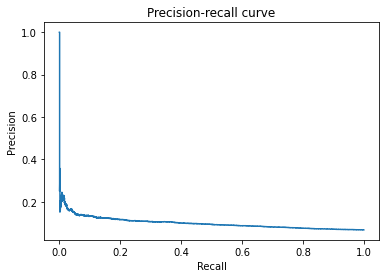

In [33]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
y_score = model.predict(X_test)
print(confusion_matrix(y_test,y_score, normalize='true'))
print(classification_report(y_test,y_score))

y_pred = model.predict_proba(X_test)[:,1]
print('Average precision: {}'.format(average_precision_score(y_test, y_pred)))

fpr, tpr, auc_th = roc_curve(y_test, y_pred)
precision, recall, pr_th = precision_recall_curve(y_test, y_pred)

plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-recall curve')
plt.show()

In [134]:
import pickle
fold_1.to_csv('../data/final/fold1.csv')
fold_2.to_csv('../data/final/fold2.csv')
fold_3.to_csv('../data/final/fold3.csv')
fold_4.to_csv('../data/final/fold4.csv')
pickle.dump(custom_cv, open( '../data/final/custom_cv.pkl', "wb" ))

In [135]:
custom_cv_loaded = pickle.load( open( '../data/final/custom_cv.pkl', "rb" ) )
print(custom_cv_loaded)
print(custom_cv)

In [54]:
X_test.columns

Index(['BUN', 'bicarbonate', 'calcium', 'chloride', 'creatinine', 'glucose',
       'potassium', 'sodium', 'BUN_min', 'BUN_mean', 'BUN_max', 'BUN_var',
       'bicarbonate_min', 'bicarbonate_mean', 'bicarbonate_max',
       'bicarbonate_var', 'calcium_min', 'calcium_mean', 'calcium_max',
       'calcium_var', 'chloride_min', 'chloride_mean', 'chloride_max',
       'chloride_var', 'creatinine_min', 'creatinine_mean', 'creatinine_max',
       'creatinine_var', 'glucose_min', 'glucose_mean', 'glucose_max',
       'glucose_var', 'potassium_min', 'potassium_mean', 'potassium_max',
       'potassium_var', 'sodium_min', 'sodium_mean', 'sodium_max',
       'sodium_var'],
      dtype='object')

In [57]:
graph_label = ['BUN',
               'Bicarbonate', 
               'Calcium', 
               'Chloride', 
               'Creatinine',
               'Glucose',
       'Potassium', 
               'Sodium', 
    'Min BUN',
 'Mean BUN',
 'Max BUN',
 'Var BUN',
 'Min Bicarbonate',
 'Mean Bicarbonate',
 'Max Bicarbonate',
 'Var Bicarbonate',
 'Min Calcium',
 'Mean Calcium',
 'Max Calcium',
 'Var Calcium',
 'Min Chloride',
 'Mean Chloride',
 'Max Chloride',
 'Var Chloride',
 'Min Creatinine',
 'Mean Creatinine',
 'Max Creatinine',
 'Var Creatinine',
 'Min Glucose',
 'Mean Glucose',
 'Max Glucose',
 'Var Glucose',
 'Min Potassium',
 'Mean Potassium',
 'Max Potassium',
 'Var Potassium',
 'Min Sodium',
 'Mean Sodium',
 'Max Sodium',
 'Var Sodium']

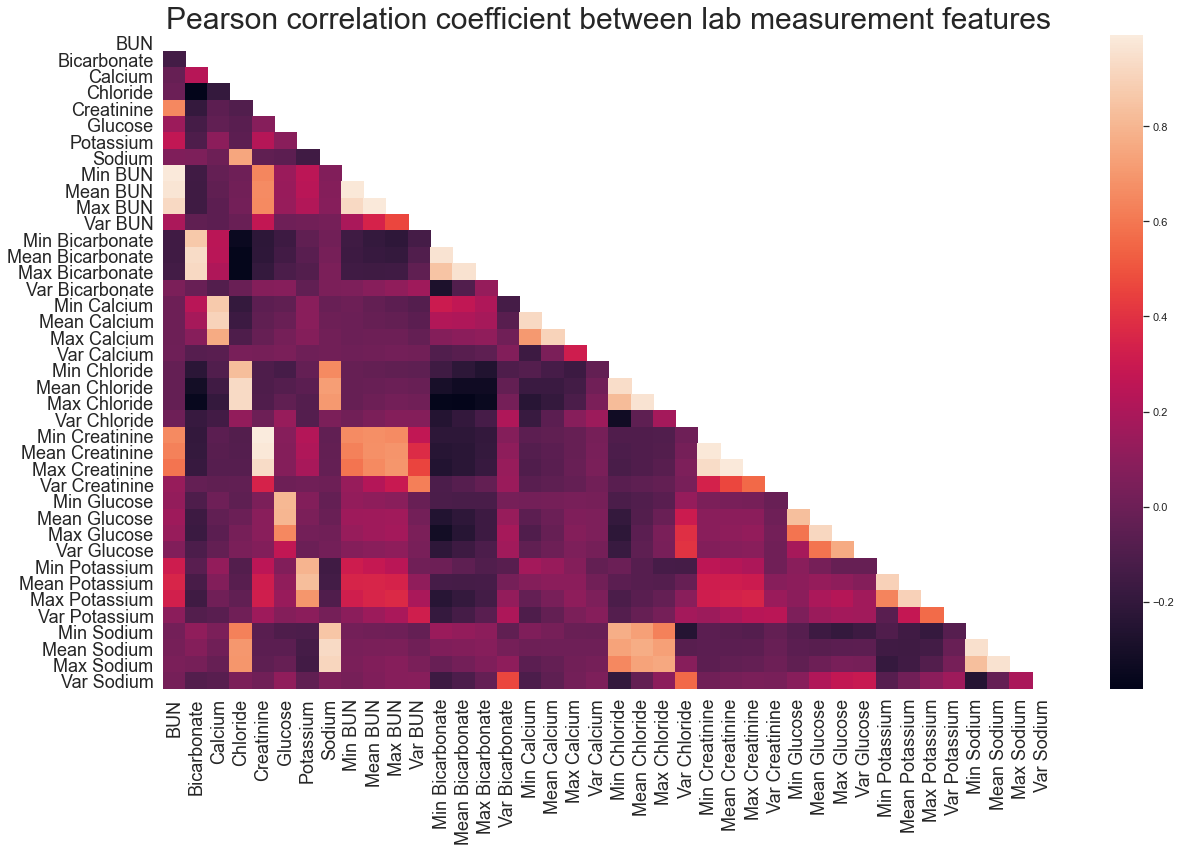

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette("bright")

num_corr_mat = np.corrcoef(X_test.values, rowvar=False)

mask = np.triu(np.ones_like(num_corr_mat, dtype=np.bool))
sns.set(style="white")

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 12))

ax = sns.heatmap(num_corr_mat, annot=False, mask=mask, xticklabels = graph_label, yticklabels = graph_label)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
ax.set_title("Pearson correlation coefficient between lab measurement features", fontsize=30)

plt.tight_layout()
plt.savefig('../images/num_correlations.png')

In [72]:
import xgboost as xgb
random_state=2020

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

weight = (y_train==0).sum()/(y_train==1).sum()

param = {'max_depth': 2, 'eta': 1, 'objective': 'binary:logistic'}
param['nthread'] = 4
param['eval_metric'] = 'aucpr'
param['scale_pos_weight'] = weight
param['random_state'] = random_state

evallist = [(dtest, 'eval'), (dtrain, 'train')]

num_round = 17
bst = xgb.train(param, dtrain, num_round, evallist)

[0]	eval-aucpr:0.08130	train-aucpr:0.09323
[1]	eval-aucpr:0.09382	train-aucpr:0.10792
[2]	eval-aucpr:0.10421	train-aucpr:0.11649
[3]	eval-aucpr:0.10937	train-aucpr:0.12197
[4]	eval-aucpr:0.11298	train-aucpr:0.12591
[5]	eval-aucpr:0.11146	train-aucpr:0.12779
[6]	eval-aucpr:0.11711	train-aucpr:0.13145
[7]	eval-aucpr:0.11720	train-aucpr:0.13289
[8]	eval-aucpr:0.11864	train-aucpr:0.13347
[9]	eval-aucpr:0.11876	train-aucpr:0.13384
[10]	eval-aucpr:0.11846	train-aucpr:0.13466
[11]	eval-aucpr:0.11721	train-aucpr:0.13546
[12]	eval-aucpr:0.11831	train-aucpr:0.13668
[13]	eval-aucpr:0.11811	train-aucpr:0.13747
[14]	eval-aucpr:0.11838	train-aucpr:0.13917
[15]	eval-aucpr:0.11888	train-aucpr:0.13954
[16]	eval-aucpr:0.11831	train-aucpr:0.14068


[0]	validation_0-aucpr:0.14779	validation_0-error:0.07047	validation_0-logloss:0.50301	validation_1-aucpr:0.10232	validation_1-error:0.06212	validation_1-logloss:0.49818
Multiple eval metrics have been passed: 'validation_1-logloss' will be used for early stopping.

Will train until validation_1-logloss hasn't improved in 10 rounds.
[1]	validation_0-aucpr:0.16619	validation_0-error:0.07054	validation_0-logloss:0.40046	validation_1-aucpr:0.10549	validation_1-error:0.06106	validation_1-logloss:0.39232
[2]	validation_0-aucpr:0.17835	validation_0-error:0.07065	validation_0-logloss:0.33931	validation_1-aucpr:0.11028	validation_1-error:0.06061	validation_1-logloss:0.32830
[3]	validation_0-aucpr:0.18632	validation_0-error:0.07068	validation_0-logloss:0.30131	validation_1-aucpr:0.10993	validation_1-error:0.06056	validation_1-logloss:0.28845
[4]	validation_0-aucpr:0.18973	validation_0-error:0.07065	validation_0-logloss:0.27735	validation_1-aucpr:0.11077	validation_1-error:0.06075	validation_1-l

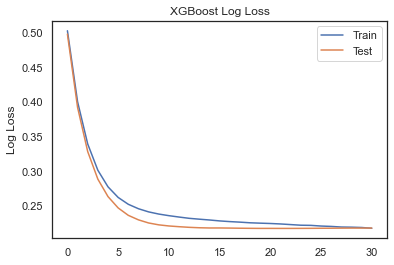

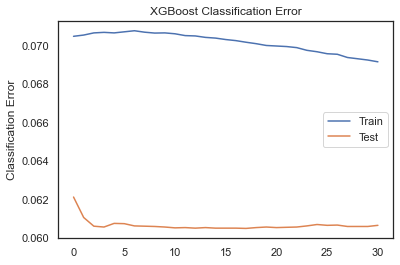

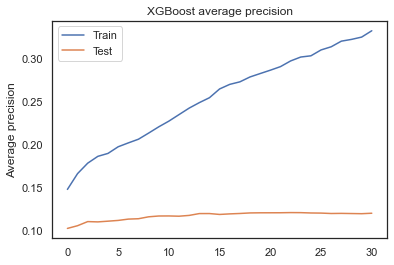

In [83]:
from xgboost import XGBClassifier
from sklearn.metrics import average_precision_score

model = XGBClassifier()
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, early_stopping_rounds=10, eval_metric=['aucpr','error', 'logloss'],\
          eval_set=eval_set, verbose=True)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
ap = average_precision_score(y_test, predictions)
print("Average precision: %.2f%%" % (ap * 100.0))
# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()
# plot classification error
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')
# plot average precision
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['aucpr'], label='Train')
ax.plot(x_axis, results['validation_1']['aucpr'], label='Test')
ax.legend()
plt.ylabel('Average precision')
plt.title('XGBoost average precision')

plt.show()

[0]	validation_0-aucpr:0.10474	validation_0-error:0.34794	validation_0-logloss:0.69262	validation_1-aucpr:0.08760	validation_1-error:0.33182	validation_1-logloss:0.69256
Multiple eval metrics have been passed: 'validation_1-logloss' will be used for early stopping.

Will train until validation_1-logloss hasn't improved in 10 rounds.
[1]	validation_0-aucpr:0.11750	validation_0-error:0.39717	validation_0-logloss:0.69213	validation_1-aucpr:0.10189	validation_1-error:0.37980	validation_1-logloss:0.69198
[2]	validation_0-aucpr:0.12372	validation_0-error:0.39503	validation_0-logloss:0.69150	validation_1-aucpr:0.10679	validation_1-error:0.37833	validation_1-logloss:0.69126
[3]	validation_0-aucpr:0.12285	validation_0-error:0.39716	validation_0-logloss:0.69098	validation_1-aucpr:0.10664	validation_1-error:0.38213	validation_1-logloss:0.69069
[4]	validation_0-aucpr:0.12658	validation_0-error:0.40358	validation_0-logloss:0.69066	validation_1-aucpr:0.11208	validation_1-error:0.38965	validation_1-l

[48]	validation_0-aucpr:0.13473	validation_0-error:0.39261	validation_0-logloss:0.67367	validation_1-aucpr:0.11617	validation_1-error:0.37172	validation_1-logloss:0.67037
[49]	validation_0-aucpr:0.13497	validation_0-error:0.39309	validation_0-logloss:0.67345	validation_1-aucpr:0.11649	validation_1-error:0.37254	validation_1-logloss:0.67015
[50]	validation_0-aucpr:0.13515	validation_0-error:0.39383	validation_0-logloss:0.67317	validation_1-aucpr:0.11654	validation_1-error:0.37352	validation_1-logloss:0.66981
[51]	validation_0-aucpr:0.13500	validation_0-error:0.39501	validation_0-logloss:0.67287	validation_1-aucpr:0.11638	validation_1-error:0.37386	validation_1-logloss:0.66943
[52]	validation_0-aucpr:0.13515	validation_0-error:0.39467	validation_0-logloss:0.67265	validation_1-aucpr:0.11629	validation_1-error:0.37418	validation_1-logloss:0.66923
[53]	validation_0-aucpr:0.13530	validation_0-error:0.39508	validation_0-logloss:0.67237	validation_1-aucpr:0.11644	validation_1-error:0.37418	val

[96]	validation_0-aucpr:0.13947	validation_0-error:0.38938	validation_0-logloss:0.66241	validation_1-aucpr:0.11901	validation_1-error:0.36948	validation_1-logloss:0.65734
[97]	validation_0-aucpr:0.13967	validation_0-error:0.38990	validation_0-logloss:0.66220	validation_1-aucpr:0.11939	validation_1-error:0.36965	validation_1-logloss:0.65707
[98]	validation_0-aucpr:0.13976	validation_0-error:0.38927	validation_0-logloss:0.66198	validation_1-aucpr:0.11952	validation_1-error:0.36897	validation_1-logloss:0.65683
[99]	validation_0-aucpr:0.13975	validation_0-error:0.39001	validation_0-logloss:0.66184	validation_1-aucpr:0.11954	validation_1-error:0.37003	validation_1-logloss:0.65664


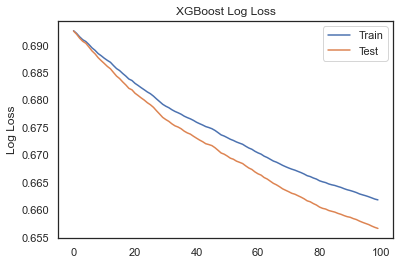

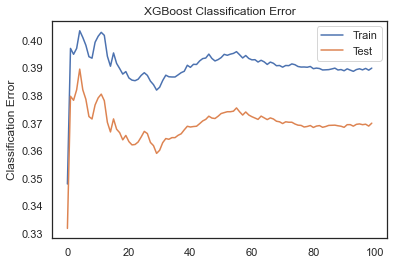

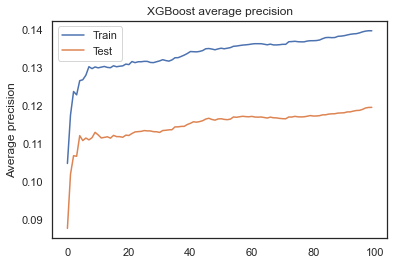

In [86]:
model = XGBClassifier(silent=False, 
                      scale_pos_weight=weight,
                      learning_rate=0.01,  
                      colsample_bytree = 0.4,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=100, 
                      reg_alpha = 0.3,
                      max_depth=4, 
                      gamma=10)
model.fit(X_train, y_train, early_stopping_rounds=10, eval_metric=['aucpr','error', 'logloss'],\
          eval_set=eval_set, verbose=True)

results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()
# plot classification error
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')
# plot average precision
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['aucpr'], label='Train')
ax.plot(x_axis, results['validation_1']['aucpr'], label='Test')
ax.legend()
plt.ylabel('Average precision')
plt.title('XGBoost average precision')

plt.show()

In [120]:
94/6

15.666666666666666

In [84]:
y_pred = model.predict_proba(X_test)
y_pred

array([[0.9159795 , 0.0840205 ],
       [0.8863204 , 0.11367957],
       [0.9086497 , 0.09135029],
       ...,
       [0.91888005, 0.08111996],
       [0.932076  , 0.06792399],
       [0.9244028 , 0.07559722]], dtype=float32)

In [1]:
import pandas as pd
import pickle
fold1 = pd.read_csv('../data/final/fold1.csv')
fold2 = pd.read_csv('../data/final/fold2.csv')
fold3 = pd.read_csv('../data/final/fold3.csv')
fold4 = pd.read_csv('../data/final/fold4.csv')

/Users/zhannahakhverdyan/anaconda3/envs/predict_dialisys_need/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
fold1.set_index('Unnamed: 0', inplace=True)
fold2.set_index('Unnamed: 0', inplace=True)
fold3.set_index('Unnamed: 0', inplace=True)
fold4.set_index('Unnamed: 0', inplace=True)
columns = ['BUN_min', 'BUN_mean', 'BUN_max', 'BUN_var', 'bicarbonate_min',
       'bicarbonate_mean', 'bicarbonate_max', 'bicarbonate_var', 'calcium_min',
       'calcium_mean', 'calcium_max', 'calcium_var', 'chloride_min',
       'chloride_mean', 'chloride_max', 'chloride_var', 'creatinine_min',
       'creatinine_mean', 'creatinine_max', 'creatinine_var', 'glucose_min',
       'glucose_mean', 'glucose_max', 'glucose_var', 'potassium_min',
       'potassium_mean', 'potassium_max', 'potassium_var', 'sodium_min',
       'sodium_mean', 'sodium_max', 'sodium_var']
X_train = pd.concat([fold1[columns], fold2[columns], fold3[columns]], axis=0)
print(X_train.shape)
y_train = pd.concat([fold1['positive_window'], fold2['positive_window'], fold3['positive_window']], axis=0)
print(y_train.shape)
X_test = fold4[columns]
print(X_test.shape)
y_test = fold4['positive_window']
print(y_test.shape)

(132164, 32)
(132164,)
(43720, 32)
(43720,)


In [4]:
import numpy as np
cv1_train = np.concatenate((np.array(fold1.index), np.array(fold2.index)))
cv1_test = np.array(fold3.index)
cv2_train = np.concatenate((np.array(fold1.index), np.array(fold3.index))) 
cv2_test = np.array(fold2.index)
cv3_train = np.concatenate((np.array(fold2.index), np.array(fold3.index)))
cv3_test = np.array(fold1.index)
custom_cv = []
custom_cv.append((cv1_train, cv1_test))
custom_cv.append((cv2_train, cv2_test))
custom_cv.append((cv3_train, cv3_test))
custom_cv

[(array([   27,    28,    40, ..., 89318, 89319, 89320]),
  array([    5,     6,     7, ..., 89329, 89330, 89331])),
 (array([   27,    28,    40, ..., 89329, 89330, 89331]),
  array([    8,    17,    81, ..., 89318, 89319, 89320])),
 (array([    8,    17,    81, ..., 89329, 89330, 89331]),
  array([   27,    28,    40, ..., 89313, 89321, 89322]))]

In [23]:
#o1 = [index for index in fold1['patientunitstayid'].unique() if index in np.concatenate((fold2['patientunitstayid'].unique(), fold3['patientunitstayid'].unique()))]
#o1
o2 = [index for index in fold2['patientunitstayid'].unique() if index in fold3['patientunitstayid'].unique()]
o2

[]

In [31]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import average_precision_score, make_scorer
random_state=2020

xgbc = xgb.XGBClassifier(scale_pos_weight=15, objective='binary:logistic', \
                         eval_metric=['aucpr'], \
                             random_state=random_state, early_stopping_rounds=10)


# Define our search space for grid search
search_space = [
  {
    'n_estimators': [10, 50, 100],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 6, 12],
    'colsample_bytree': [i/10.0 for i in range(1, 3)],
    'gamma': [i/10.0 for i in range(3)]
    #'lambda': np.logspace(-1, 1, num=3) 
  }
]

# AUC and average precision as score
scoring = {'AUC':'roc_auc', 'Average precision':make_scorer(average_precision_score)}
# Define grid search
grid = GridSearchCV(
  xgbc,
  param_grid=search_space,
  cv=custom_cv,
  scoring=scoring,
  refit='Average precision',
  verbose=1,
  n_jobs=-1,
  return_train_score=True
)
# Fit grid search
grid.fit(X_train, y_train)

Fitting 3 folds for each of 162 candidates, totalling 486 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 24.9min
[Parallel(n_jobs=-1)]: Done 486 out of 486 | elapsed: 27.7min finished


GridSearchCV(cv=[(array([   27,    28,    40, ..., 89318, 89319, 89320]),
                  array([    5,     6,     7, ..., 89329, 89330, 89331])),
                 (array([   27,    28,    40, ..., 89329, 89330, 89331]),
                  array([    8,    17,    81, ..., 89318, 89319, 89320])),
                 (array([    8,    17,    81, ..., 89329, 89330, 89331]),
                  array([   27,    28,    40, ..., 89313, 89321, 89322]))],
             error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None...
                                     verbosity=None),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'colsample_bytree': [0.1, 0.2],
                          'gamma': [0.0, 0.1, 0.2],
                          'learning_rate': [0.01, 0.1, 0.3],
                          'max_depth': [3, 6, 12],
                          'n_estimators': [10, 50, 100]}],
             p

[[0.97910382 0.02089618]
 [0.95520869 0.04479131]]
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.96     40773
         1.0       0.13      0.04      0.07      2947

    accuracy                           0.92     43720
   macro avg       0.53      0.51      0.51     43720
weighted avg       0.88      0.92      0.90     43720

Average precision: 0.09270213563687528
Average ROC score: 0.5841426196472876


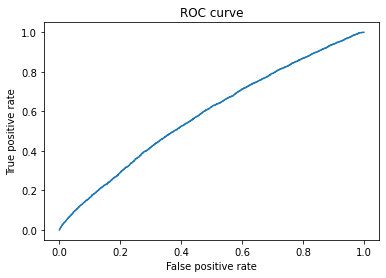

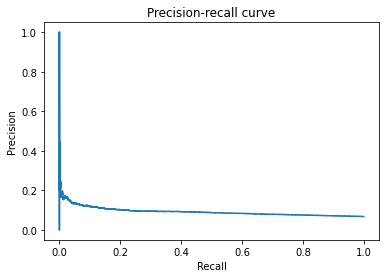

In [8]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

y_score = grid.best_estimator_.predict(X_test)

print(confusion_matrix(y_test,y_score, normalize='true'))
print(classification_report(y_test,y_score))

y_pred = grid.best_estimator_.predict_proba(X_test)[:,1]
print('Average precision: {}'.format(average_precision_score(y_test, y_pred)))
print('Average ROC score: {}'.format(roc_auc_score(y_test, y_pred)))

fpr, tpr, auc_th = roc_curve(y_test, y_pred)
precision, recall, pr_th = precision_recall_curve(y_test, y_pred)

plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-recall curve')
plt.show()

In [9]:
grid.cv_results_

{'mean_fit_time': array([ 1.15386073,  3.51080187,  6.48616306,  1.42402736,  5.40196665,
        10.76358334,  2.30315328,  9.99895366, 19.4848365 ,  1.14749432,
         3.78219692,  7.04867109,  1.48093168,  5.48651807, 10.58537022,
         2.31848804, 10.08925637, 19.18146054,  1.14748255,  3.62327687,
         6.87712431,  1.50006564,  5.56100067, 10.42467666,  2.28937157,
         9.95897937, 19.31139612,  1.13777812,  3.6487484 ,  6.71435515,
         1.43222555,  5.32783   , 10.68535574,  2.34070396,  9.66418584,
        18.84644119,  1.0790534 ,  3.72361366,  6.96857556,  1.46618613,
         5.44976473, 10.33137433,  2.26361505,  9.70359468, 18.61366669,
         1.07469249,  3.59262927,  7.16575408,  1.60005569,  6.23417004,
        10.43952576,  2.32969832,  9.65062944, 18.56759866,  1.07882667,
         3.58077772,  6.99599942,  1.44873023,  5.34158985, 10.40766327,
         2.29833396,  9.63094234, 19.20692301,  1.08944694,  3.72113037,
         6.76724998,  1.44174075, 

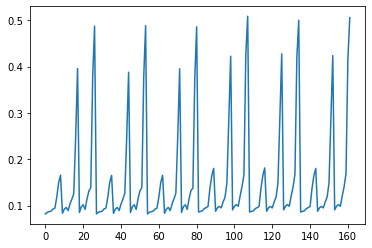

In [28]:
plt.plot(grid.cv_results_['mean_test_Average precision'])
#plt.plot(grid.cv_results_['mean_train_Average precision'])

In [20]:
ap_rank_df = pd.DataFrame({'mean_ap':grid.cv_results_['mean_test_Average precision'], \
                           'std':grid.cv_results_['std_test_Average precision'],  \
                           'rank' :grid.cv_results_['rank_test_Average precision'],
                           'split 1':grid.cv_results_['split0_test_Average precision'],\
                          'split 2':grid.cv_results_['split1_test_Average precision'],\
                          'split 3':grid.cv_results_['split2_test_Average precision']})
ap_rank_df.sort_values(by='rank')

,mean_ap,std,rank,split 1,split 2,split 3
107,0.508790,0.007736,1,0.516327,0.498154,0.511890
161,0.505816,0.014982,2,0.521431,0.485606,0.510411
134,0.500059,0.011051,3,0.513614,0.486545,0.500017
53,0.488461,0.003461,4,0.489939,0.483681,0.491762
26,0.487286,0.005584,5,0.494881,0.481617,0.485361
...,...,...,...,...,...,...
63,0.083282,0.001299,157,0.085095,0.082633,0.082120
9,0.083282,0.001299,157,0.085095,0.082633,0.082120
27,0.081926,0.001435,160,0.083703,0.081884,0.080189
54,0.081926,0.001435,160,0.083703,0.081884,0.080189


In [14]:
grid.best_params_

{'colsample_bytree': 0.2,
 'gamma': 0.0,
 'learning_rate': 0.3,
 'max_depth': 12,
 'n_estimators': 100}

In [17]:
fold1_X = fold1[columns]
fold1_y = fold1['positive_window']
fold2_X = fold2[columns]
fold2_y = fold2['positive_window']
fold3_X = fold3[columns]
fold3_y = fold3['positive_window']

y_pred1 = grid.best_estimator_.predict_proba(fold1_X)[:,1]
print('Average precision for fold 1: {}'.format(average_precision_score(fold1_y, y_pred1)))

y_pred2 = grid.best_estimator_.predict_proba(fold2_X)[:,1]
print('Average precision for fold 2: {}'.format(average_precision_score(fold2_y, y_pred2)))

y_pred3 = grid.best_estimator_.predict_proba(fold3_X)[:,1]
print('Average precision for fold 3: {}'.format(average_precision_score(fold3_y, y_pred3)))

Average precision for fold 1: 0.9999940838228804
Average precision for fold 2: 0.9999968136177657
Average precision for fold 3: 0.9999972319344297


[0]	validation_0-aucpr:0.21247	validation_1-aucpr:0.08971
Multiple eval metrics have been passed: 'validation_1-aucpr' will be used for early stopping.

Will train until validation_1-aucpr hasn't improved in 10 rounds.
[1]	validation_0-aucpr:0.29438	validation_1-aucpr:0.09191
[2]	validation_0-aucpr:0.35826	validation_1-aucpr:0.09093
[3]	validation_0-aucpr:0.39311	validation_1-aucpr:0.09391
[4]	validation_0-aucpr:0.43653	validation_1-aucpr:0.09467
[5]	validation_0-aucpr:0.50502	validation_1-aucpr:0.09970
[6]	validation_0-aucpr:0.54957	validation_1-aucpr:0.09878
[7]	validation_0-aucpr:0.57712	validation_1-aucpr:0.09825
[8]	validation_0-aucpr:0.60625	validation_1-aucpr:0.09796
[9]	validation_0-aucpr:0.65029	validation_1-aucpr:0.09748
[10]	validation_0-aucpr:0.68305	validation_1-aucpr:0.09735
[11]	validation_0-aucpr:0.71747	validation_1-aucpr:0.09795
[12]	validation_0-aucpr:0.73230	validation_1-aucpr:0.09765
[13]	validation_0-aucpr:0.75489	validation_1-aucpr:0.09696
[14]	validation_0-aucpr

KeyError: 'logloss'

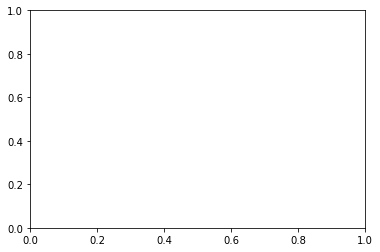

In [30]:
eval_set = [(X_train, y_train), (X_test, y_test)]

model = xgb.XGBClassifier(scale_pos_weight=15, objective='binary:logistic', \
                         eval_metric=['aucpr'], \
                             random_state=random_state, early_stopping_rounds=10, colsample_bytree= 0.2,\
                          gamma=0.0, learning_rate= 0.3,max_depth= 12, n_estimators=100)
model.fit(X_train, y_train, early_stopping_rounds=10,\
          eval_set=eval_set, verbose=True)

results = model.evals_result()
epochs = len(results['validation_0']['aucpr'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()
# plot classification error
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')
# plot average precision
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['aucpr'], label='Train')
ax.plot(x_axis, results['validation_1']['aucpr'], label='Test')
ax.legend()
plt.ylabel('Average precision')
plt.title('XGBoost average precision')

plt.show()

In [49]:
# change the prediction window to 12-36h
def relabel_data(df):
    df['time_to_detect'] = pd.to_timedelta(df['time_to_detect'])
    df.loc[df['time_to_detect']<=pd.Timedelta('36h'), 'positive_window'] = 1
    return df

print(fold1.positive_window.sum()/len(fold1))
fold1 = relabel_data(fold1)
print(fold1.positive_window.sum()/len(fold1))
fold2 = relabel_data(fold2)
fold3 = relabel_data(fold3)
fold4 = relabel_data(fold4)

columns = ['BUN', 'bicarbonate', 'calcium', 'chloride',
       'creatinine', 'glucose', 'potassium', 'sodium',
           'BUN_min', 'BUN_mean', 'BUN_max', 'BUN_var', 'bicarbonate_min',
       'bicarbonate_mean', 'bicarbonate_max', 'bicarbonate_var', 'calcium_min',
       'calcium_mean', 'calcium_max', 'calcium_var', 'chloride_min',
       'chloride_mean', 'chloride_max', 'chloride_var', 'creatinine_min',
       'creatinine_mean', 'creatinine_max', 'creatinine_var', 'glucose_min',
       'glucose_mean', 'glucose_max', 'glucose_var', 'potassium_min',
       'potassium_mean', 'potassium_max', 'potassium_var', 'sodium_min',
       'sodium_mean', 'sodium_max', 'sodium_var']
X_train = pd.concat([fold1[columns], fold2[columns], fold3[columns]], axis=0)
print(X_train.shape)
y_train = pd.concat([fold1['positive_window'], fold2['positive_window'], fold3['positive_window']], axis=0)
print(y_train.shape)
X_test = fold4[columns]
print(X_test.shape)
y_test = fold4['positive_window']
print(y_test.shape)
print(y_train.sum()/len(y_train))
print(y_test.sum()/len(y_test))
print(y_test.sum())

0.06696634393729829
0.13038266482249886
(132164, 40)
(132164,)
(43720, 40)
(43720,)
0.12974032262946036
0.1334858188472095
5836.0


In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
rf = RandomForestClassifier(class_weight='balanced', random_state=random_state)
param_grid = {'max_depth' : [3, 6, 12, None], 'n_estimators' : [10, 50, 100, 200], \
              'min_samples_split': [2, 10]}
scoring = {'AUC':'roc_auc', 'Average precision':make_scorer(average_precision_score)}
gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring=scoring, refit='Average precision',\
                  n_jobs=-1, cv=custom_cv, verbose=1, return_train_score=True)
gs.fit(X_train, y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed: 18.3min finished


GridSearchCV(cv=[(array([   27,    28,    40, ..., 89318, 89319, 89320]),
                  array([    5,     6,     7, ..., 89329, 89330, 89331])),
                 (array([   27,    28,    40, ..., 89329, 89330, 89331]),
                  array([    8,    17,    81, ..., 89318, 89319, 89320])),
                 (array([    8,    17,    81, ..., 89329, 89330, 89331]),
                  array([   27,    28,    40, ..., 89313, 89321, 89322]))],
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=...
                                              oob_score=False,
                                              random_state=2020, verbose=0,
                                              warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [3, 6, 12, None],
                         'min_samples_split': [2, 10],
                         

[[0.99778271 0.00221729]
 [0.98492118 0.01507882]]
              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93     37884
         1.0       0.51      0.02      0.03      5836

    accuracy                           0.87     43720
   macro avg       0.69      0.51      0.48     43720
weighted avg       0.82      0.87      0.81     43720

Average precision: 0.3234079929295847
Average ROC score: 0.7565084641337589


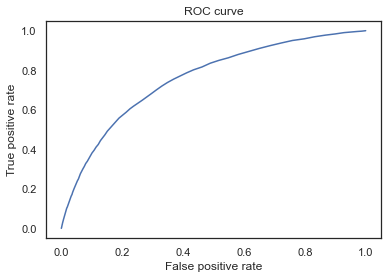

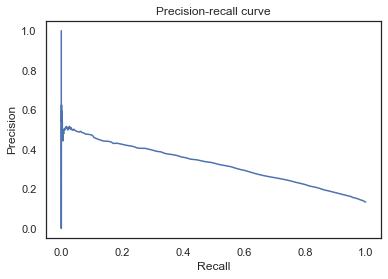

In [51]:
y_score = gs.best_estimator_.predict(X_test)

print(confusion_matrix(y_test,y_score, normalize='true'))
print(classification_report(y_test,y_score))

y_pred = gs.best_estimator_.predict_proba(X_test)[:,1]
print('Average precision: {}'.format(average_precision_score(y_test, y_pred)))
print('Average ROC score: {}'.format(roc_auc_score(y_test, y_pred)))

fpr, tpr, auc_th = roc_curve(y_test, y_pred)
precision, recall, pr_th = precision_recall_curve(y_test, y_pred)

plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-recall curve')
plt.show()